# ✅ Task 1: Load and Explore the Dataset

In [5]:
import pandas as pd

#Load dataset with error handling
try:
    file_path = "diabetes_012_health_indicators_BRFSS2015.csv"
    df = pd.read_csv(file_path)
    print("✔ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Please check the path")
    

# Display the first 10 rows
print("\n First 10 rows:")
print(df.head(10))

#Explore structure
print("\n Dataset Info:")
print(df.info())

#Check missing values
print("\n Missing Values:")
print(df.isnull().sum())

#Clean dataset (drop missing values if any)
df = df.dropna()
print("\n after cleaning, dataset shape:", df.shape)

✔ Dataset loaded successfully!

 First 10 rows:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0

# ✅ Task 2: Basic Data Analysis

In [8]:
# Basic statistics
from click import group


print("\n Descriptive Statistics:")
print(df.describe())

#Grouping: Compare BMI by Diabetes status
grouped = df.groupby("Diabetes_012")["BMI"].mean()
print("\n Average BMI by Diabetes Category:")
print(grouped)

# Insights
print("\n📊 Insight")
print("- People with Diabetes (2) tend to have higher average BMI")
print("- prediabetes group (1) has BMI between non-diabetic (0) and diabetic (2)")


 Descriptive Statistics:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.0000

# ✅ Task 3: Data Visualization

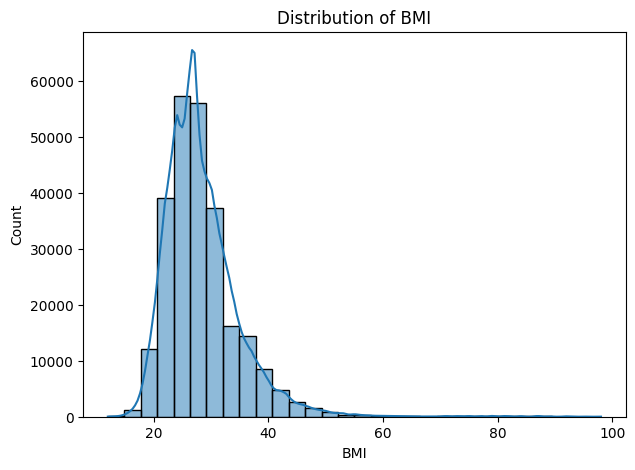

C:\Users\Achuka\AppData\Local\Temp\ipykernel_17440\3540469634.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Diabetes_012", y="BMI", data=df, ci=None)


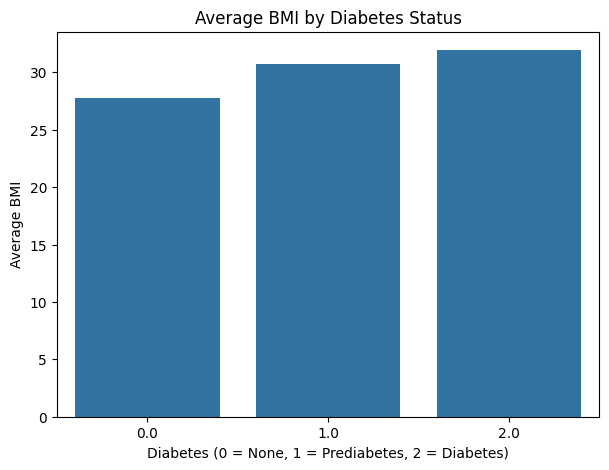

C:\Users\Achuka\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


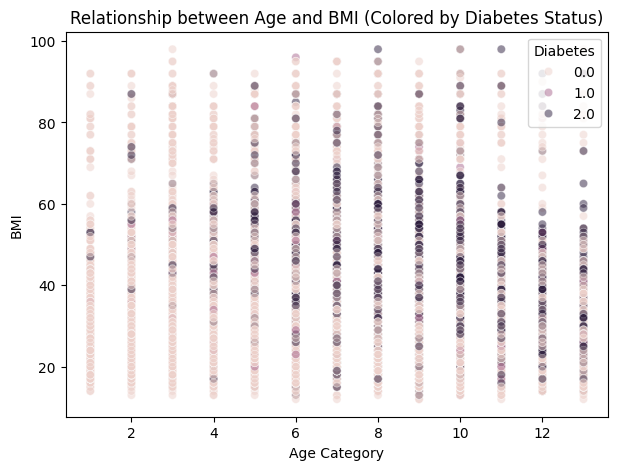

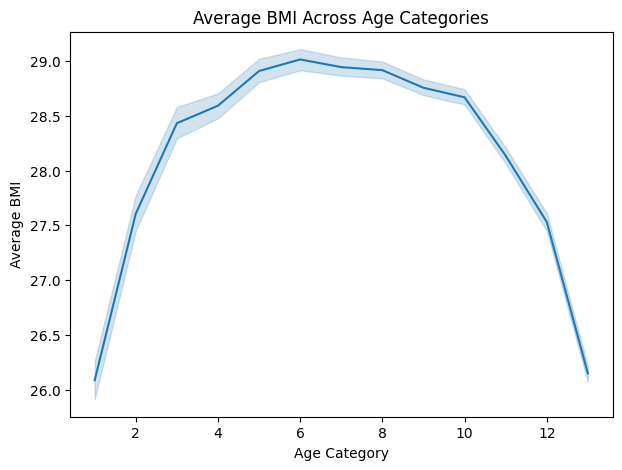

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of BMI
plt.figure(figsize=(7,5))
sns.histplot(df["BMI"], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# Bar chart: Average BMI by Diabetes status
plt.figure(figsize=(7,5))
sns.barplot(x="Diabetes_012", y="BMI", data=df, ci=None)
plt.title("Average BMI by Diabetes Status")
plt.xlabel("Diabetes (0 = None, 1 = Prediabetes, 2 = Diabetes)")
plt.ylabel("Average BMI")
plt.show()

# Scatter plot: Age vs BMI
plt.figure(figsize=(7,5))
sns.scatterplot(x="Age", y="BMI", hue="Diabetes_012", data=df, alpha=0.5)
plt.title("Relationship between Age and BMI (Colored by Diabetes Status)")
plt.xlabel("Age Category")
plt.ylabel("BMI")
plt.legend(title="Diabetes")
plt.show()

# Line chart: Trend of BMI across Age categories
plt.figure(figsize=(7,5))
sns.lineplot(x="Age", y="BMI", data=df, estimator="mean")
plt.title("Average BMI Across Age Categories")
plt.xlabel("Age Category")
plt.ylabel("Average BMI")
plt.show()
